# Extraction

## From https://coinmarketcap.com

In [1]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import csv

In [2]:
# Data since 2013/04/28 to 2020/06/07
today = datetime.date.today()
mktcap_page = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
page = urllib2.urlopen(mktcap_page)
soup = BeautifulSoup(page, 'html.parser')
table = soup.find("table")



In [3]:
## headings = [th.get_text().strip() for th in table.find("tr").find_all("td")]
headings = [th.get_text().strip() for th in table.find("tr").find_all("th")]
headings

['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap']

In [4]:
headings = [x.replace('*','') for x in headings]
headings

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [5]:
datasets = []

for row in soup.find_all("tr")[1:]:
    dataset = dict(zip(headings, (tr.get_text() for tr in row.find_all("td"))))
    if len(dataset) > 1:
        datasets.append(dataset)

datasets[0]

{'Date': 'Jul 20, 2020',
 'Open': '238.49',
 'High': '239.58',
 'Low': '234.85',
 'Close': '236.15',
 'Volume': '5,600,686,192',
 'Market Cap': '26,411,853,756'}

In [6]:
my_df = pd.DataFrame(datasets)
my_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 20, 2020",238.49,239.58,234.85,236.15,"5,600,686,192","26,411,853,756"
1,"Jul 19, 2020",235.46,239.16,233.28,238.49,"6,251,377,305","26,669,691,075"
2,"Jul 18, 2020",232.86,236.54,232.32,235.48,"5,397,402,117","26,330,601,164"
3,"Jul 17, 2020",233.69,234.42,232.11,232.77,"5,859,850,529","26,024,301,468"
4,"Jul 16, 2020",238.45,239.01,231.62,233.64,"5,832,057,567","26,118,155,895"


In [7]:
full_data = my_df.set_index('Date')
#full_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
full_data.to_csv('full_data_eth_20072020.csv', index=True, header=True)

In [8]:
full_data.head(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 20, 2020",238.49,239.58,234.85,236.15,"5,600,686,192","26,411,853,756"
"Jul 19, 2020",235.46,239.16,233.28,238.49,"6,251,377,305","26,669,691,075"
"Jul 18, 2020",232.86,236.54,232.32,235.48,"5,397,402,117","26,330,601,164"
"Jul 17, 2020",233.69,234.42,232.11,232.77,"5,859,850,529","26,024,301,468"
"Jul 16, 2020",238.45,239.01,231.62,233.64,"5,832,057,567","26,118,155,895"
"Jul 15, 2020",240.14,241.40,237.10,238.42,"6,189,328,448","26,649,577,378"
"Jul 14, 2020",239.98,242.00,237.80,240.21,"7,357,458,555","26,846,147,251"
"Jul 13, 2020",242.18,244.31,238.23,239.60,"7,787,751,468","26,775,071,858"
"Jul 12, 2020",239.46,243.31,237.77,242.13,"6,596,394,718","27,054,158,346"


In [9]:
full_data.shape

(1810, 6)

In [10]:
full_data.dtypes

Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [11]:
def obj_to_int(x):
    x = x.replace(',','')
    return float(x)
full_data['Close'] = full_data['Close'].apply(obj_to_int)
full_data['Open'] = full_data['Open'].apply(obj_to_int)
full_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 20, 2020",238.49,239.58,234.85,236.15,"5,600,686,192","26,411,853,756"
"Jul 19, 2020",235.46,239.16,233.28,238.49,"6,251,377,305","26,669,691,075"
"Jul 18, 2020",232.86,236.54,232.32,235.48,"5,397,402,117","26,330,601,164"
"Jul 17, 2020",233.69,234.42,232.11,232.77,"5,859,850,529","26,024,301,468"
"Jul 16, 2020",238.45,239.01,231.62,233.64,"5,832,057,567","26,118,155,895"


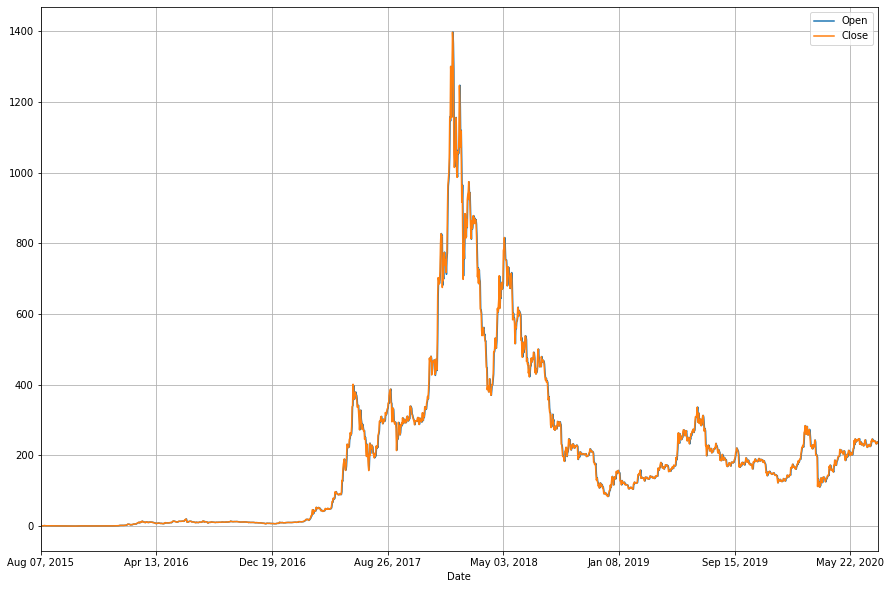

In [13]:
_= full_data[['Open','Close']][::-1].plot(grid=True, figsize=(15, 10))